# Housing Prices Kaggle Competition

Hayley Caddes

* [Processing Data](#first-bullet)
    * [Outliers](#second-bullet)
    * [Target Variable](#third-bullet)
    * [Missing Data](#fourth-bullet)
    
    
* [Feature Engineering](#fifth-bullet)
    * [Transforming Numerical to Categorical](#sixth-bullet)
    * [Label Encoding](#seventh-bullet)
    * [Dummy Variables](#ninth-bullet)
    * [Box Cox Transformation](#eigth-bullet)
  
  
* [Modeling](#tenth-bullet)
    * [Base Models](#eleventh-bullet)
    * [Stacked Models](#twelfth-bullet)

# Processing Data<a class="anchor" id="first-bullet"></a>

In [1]:
# import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette() # define color palette for notebook
sns.set_style('darkgrid') # set plot style for notebook

import warnings
warnings.filterwarnings('ignore') # ignore warnings from sklearn and seaborn

from scipy import stats
from scipy.stats import norm, skew 

pd.set_option('display.float_format', lambda x: '%.3f' %x) # limit floats to 3 decimal points
pd.set_option('display.max_columns', 100) # display up to 100 columns

In [2]:
# import the train and test datasets as dataframes

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
# display top of the training dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# display top of test dataset
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000,Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000,Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000,Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,TA,TA,PConc,TA,TA,No,GLQ,602.000,Unf,0.000,324.000,926.000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000,0.000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000,Fin,2.000,470.000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000,Unf,0.000,1017.000,1280.000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000,0.000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.000,RFn,2.000,506.000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# save the 'Id' columns to facilitate easy split after feature engineering the combined dataset

train_Id = train['Id']
test_Id = test['Id']

# drop the 'Id' column
train.drop('Id', axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)

# check the size of the dataframes
print("\nTraining dataset size after dropping 'Id' : {}".format(train.shape))
print("\nTest dataset size after dropping 'Id' : {}".format(test.shape))


Training dataset size after dropping 'Id' : (1460, 80)

Test dataset size after dropping 'Id' : (1459, 79)


## Outliers<a class="anchor" id="second-bullet"></a>

Explore outliers in the training dataset

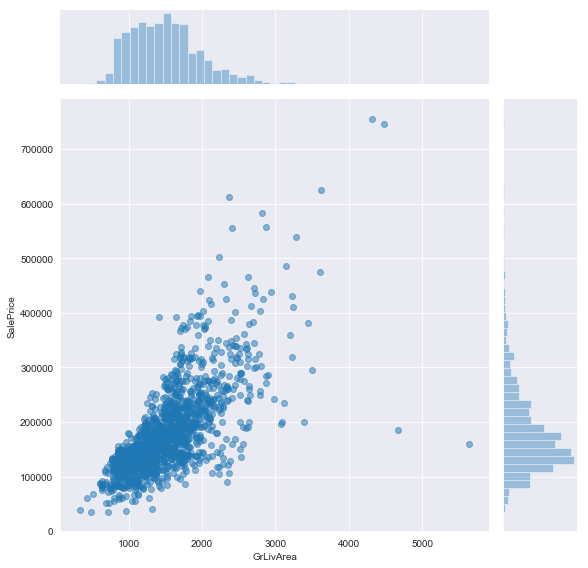

In [6]:
# plot SalePrice vs. GrLivArea

sns.jointplot(x = 'GrLivArea', y = 'SalePrice', data = train, alpha = 0.5, height = 8)

Will delete the two outliers with high GrLiveArea and low SalePrice

In [7]:
# delete outliers

train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index)
print("\nSize of training dataset without outliers : {}".format(train.shape))


Size of training dataset without outliers : (1458, 80)


## Target Variable<a class="anchor" id="third-bullet"></a>

Now look at the distribution of SalePrice to see what kind of transformation is appropriate


 mean = 180932.92 and stdev = 79467.79


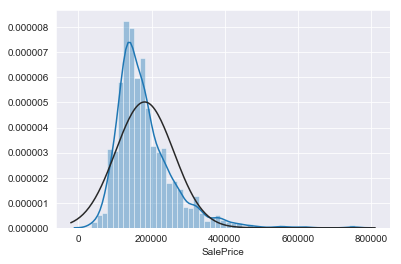

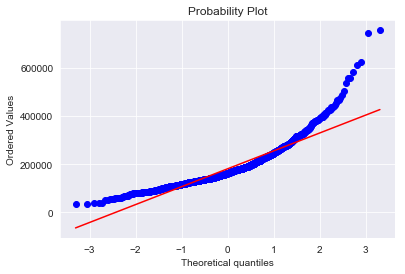

In [8]:
sns.distplot(train['SalePrice'], fit = norm)

# get the fitted parameters
mean, stdev = norm.fit(train['SalePrice'])
print("\n mean = {:.2f} and stdev = {:.2f}".format(mean, stdev))

# also get the QQ plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

SalePrice is clearly right-skewed. For linear models, this needs to be normalized. 

#### Log-transform SalePrice


 mean = 12.02 and stdev = 0.40


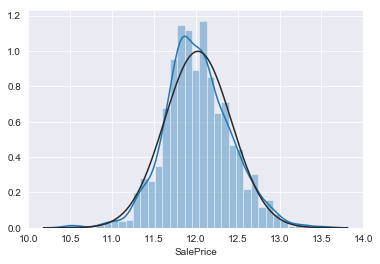

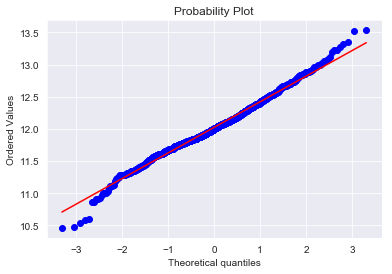

In [9]:
# use numpy log function to do the log transform

train['SalePrice'] = np.log(train['SalePrice'])

# check new distribution
sns.distplot(train['SalePrice'], fit = norm)

# get fitted parameters
mean, stdev = norm.fit(train['SalePrice'])
print("\n mean = {:.2f} and stdev = {:.2f}".format(mean, stdev))

# get QQ plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

Both plots look a lot better! The skew seems to be corrected

## Missing Data<a class="anchor" id="fourth-bullet"></a>

First combine the two data frames for feature engineering purposes

In [10]:
# assign SalePrice column to a target series
y_train = train['SalePrice']

# drop SalePrice column from training data
train.drop(['SalePrice'], axis = 1, inplace = True)

# concatenate dataframes
all_data = pd.concat([train, test]).reset_index(drop = True)

# check size of new dataframe
print("\nThe size of the combined dataframe is : {}".format(all_data.shape))


The size of the combined dataframe is : (2917, 79)


In [11]:
# delete training and test dataframes to save memory
del train, test

In [12]:
# explore the missing data

# find the percentage missing in each column that has missing values
na_list = (all_data.isna().sum()/len(all_data)) * 100
na_list = na_list.sort_values(ascending = False).to_frame()
na_list.columns = ["Percent Missing"]

# only keep columns with missing data
na_list = na_list[na_list['Percent Missing'] > 0]

# view missing data
na_list

,Percent Missing
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageCond,5.451
GarageQual,5.451
GarageYrBlt,5.451
GarageFinish,5.451


### Impute Missing Values

<strong>PoolQC</strong>: Impute "NA", which means <i>No Pool</i> according to the description. Clearly, most houses do not have a pool

In [13]:
all_data["PoolQC"] = all_data["PoolQC"].fillna('NA')

<strong>MiscFeature</strong>: Impute "NA", which means <i>No Miscellaneous Features</i> according to the data description.

In [14]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna('NA')

<strong>Alley</strong>: Impute "NA", which means <i>No Alley Access</i> according to the data description.

In [15]:
all_data["Alley"] = all_data["Alley"].fillna('NA')

<strong>Fence</strong>: Impute "NA", which means <i>No Fence</i> according to the data description.

In [16]:
all_data["Fence"] = all_data["Fence"].fillna('NA')

<strong>FireplaceQu</strong>: Impute "NA", which means <i>No Fireplace</i> according to the data description.

In [17]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna('NA')

<strong>LotFrontage</strong>: This is how much street is connected to the property. Suburban town, so most houses in the same neighborhood probably have similar lot frontages. Impute the missing values with the median of LotFrontage for that neighborhood. Note that the median should be taken only from the training set to avoid data leakage.

In [18]:
# impute median neighborhood values from training data to fill dataframe
neighborhoods = all_data.Neighborhood.unique()

# groupby 'Neighborhood' and calculate median and change to dictionary for easy mapping
LF_medians = all_data.iloc[train_Id].groupby('Neighborhood')['LotFrontage'].median().to_dict()

# fill na values
all_data['LotFrontage'] = all_data['LotFrontage'].fillna(all_data['Neighborhood'].map(LF_medians))

<strong>GarageCond, GarageQual, GarageFinish, GarageType</strong>: Impute "NA", as the data description says that means <i>No Garage</i>, and since all the missing percentages for this category are the same (except 1 house has GarageType but none of the others - still impute "NA" for this one too because there's no robust way to guess the values of the other variables (Missing Completely At Random))

In [19]:
# impute "NA" for all categorical GarageX variables

for col in ['GarageCond', 'GarageQual', 'GarageFinish', 'GarageType']:
    all_data[col] = all_data[col].fillna("NA")

<strong>GarageYrBlt, GarageArea, GarageCars</strong>: Impute 0, as the latter two have the same number of missing observations, so like above, these houses most likely don't have garages. GarageYrBlt has the same amount of missingness as the above category, so same reasoning to fill with 0.

In [20]:
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    all_data[col] = all_data[col].fillna(0)

<strong>BsmtCond, BsmtQual, BsmtExposure, BsmtFinType1, BsmtFinType2</strong>: Impute "NA", as these houses most likely don't have basements. NA for BsmtX variables means <i>No Basement</i> from the data description.

In [21]:
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    all_data[col] = all_data[col].fillna("NA")

<strong>BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath</strong>: Impute 0, as these houses most likely don't have basements.

In [22]:
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    all_data[col] = all_data[col].fillna(0)

<strong>MasVnrArea, MasVnrType</strong>: Impute "NA" for Type, which most likely means the house doensn't have any masonry veneer. Impute 0 for Area. 

In [23]:
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data["MasVnrType"] = all_data['MasVnrType'].fillna("NA")

<strong>MSZoning</strong>: Impute most common value from that neighborhood.

In [24]:
# get most common MSZoning category by neighborhood
MSZ_medians = {neigh:all_data.iloc[train_Id][all_data['Neighborhood'] == neigh]['MSZoning'].mode()[0] for neigh in neighborhoods}

# fill na values
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['Neighborhood'].map(MSZ_medians))

<strong>Utilities</strong>: All records are "AllPub" except for a "NoSeWa" in the training set. Drop this column, as it won't necessarily give us any info about SalePrice.

In [25]:
all_data.drop('Utilities', axis = 1, inplace = True)

<strong>Functional</strong>: The data description says "NA" means Typical. Fill values with 'Typ'.

In [26]:
all_data["Functional"] = all_data["Functional"].fillna('Typ')

<strong>Electrical</strong>: Only one NA value. Most common value is SBrkr in dataset, so use that as fill value.

In [27]:
all_data["Electrical"] = all_data["Electrical"].fillna('SBrkr')

<strong>Exterior1st, Exterior2nd, KitchenQual, SaleType</strong>: Only has 1 missing value, so impute most common values.

In [28]:
for col in ['Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType']:
    all_data[col] = all_data[col].fillna(all_data.iloc[train_Id][col].mode()[0])

Are there any more missing values?

In [29]:
# find the percentage missing in each column that has missing values
na_list = (all_data.isna().sum()/len(all_data)) * 100
na_list = na_list.sort_values(ascending = False).to_frame()
na_list.columns = ["Percent Missing"]

# only keep columns with missing data
na_list = na_list[na_list['Percent Missing'] > 0]

# view missing data
na_list

,Percent Missing


Yay! No more missing values.

# Feature Engineering<a class="anchor" id="fifth-bullet"></a>

Let's decide what to do with each column:

In [30]:
# look at all columns and their dtypes

dict(zip(list(all_data.columns), [all_data[col].dtypes for col in all_data.columns]))

{'MSSubClass': dtype('int64'),
 'MSZoning': dtype('O'),
 'LotFrontage': dtype('float64'),
 'LotArea': dtype('int64'),
 'Street': dtype('O'),
 'Alley': dtype('O'),
 'LotShape': dtype('O'),
 'LandContour': dtype('O'),
 'LotConfig': dtype('O'),
 'LandSlope': dtype('O'),
 'Neighborhood': dtype('O'),
 'Condition1': dtype('O'),
 'Condition2': dtype('O'),
 'BldgType': dtype('O'),
 'HouseStyle': dtype('O'),
 'OverallQual': dtype('int64'),
 'OverallCond': dtype('int64'),
 'YearBuilt': dtype('int64'),
 'YearRemodAdd': dtype('int64'),
 'RoofStyle': dtype('O'),
 'RoofMatl': dtype('O'),
 'Exterior1st': dtype('O'),
 'Exterior2nd': dtype('O'),
 'MasVnrType': dtype('O'),
 'MasVnrArea': dtype('float64'),
 'ExterQual': dtype('O'),
 'ExterCond': dtype('O'),
 'Foundation': dtype('O'),
 'BsmtQual': dtype('O'),
 'BsmtCond': dtype('O'),
 'BsmtExposure': dtype('O'),
 'BsmtFinType1': dtype('O'),
 'BsmtFinSF1': dtype('float64'),
 'BsmtFinType2': dtype('O'),
 'BsmtFinSF2': dtype('float64'),
 'BsmtUnfSF': dtype('

<strong>Features that are numerical that should be categorical</strong>:
* MSSubClass ---> change number categories to strings
* OverallQual & OverallCond ---> should they be categorical? Change to strings?
* MoSold & YrSold ---> change numbers to strings

<strong>Features to Label Encode</strong>: There are a lot of Object dtypes. A few would benefit from label encoding, which we have to remember introduces ordinality. Candidates for label encoding:
* ExterQual --> ordinal categorical
* ExterCond ---> same
* BsmtQual ---> same
* BsmtCond ---> same
* BsmtExposure ---> inherent ordinality in quality of basment exposure
* BsmtFinType1 ---> same
* BsmtFinType2 ---> same
* KitchenQual ---> same
* GarageQual ---> same
* GarageCond ---> same
* GarageFinish ---> inherent ordinality in level of finished-ness
* HeatingQC ---> same
* FireplaceQC ---> same
* PoolQC ---> same
* Functional ---> same
* Fence ---> inherent ordinality in fence quality
* Lotshape ---> inherent ordinality in reguarlity or irregulairty of lot shape
* Street ---> either paved or gravel (already binary)
* CentralAir ---> either yes or no (already binary)
* Paved Drive ---> inherent ordinality in yes, no, or poorly pavedd
* Alley ---> inherent ordinality in paved, gravel, no alley


<strong>Features to be transformed with binary encoding</strong>:
* Heating ---> change to 'GasA' or 'NotGasA' as 'GasA' has overwhelming majority
* Electrical ---> change to 'Brkr' or 'Fuse' as 'SBrkr' has overwhelming majority
* MiscFeature ---> either 'NA' or 'Shed' (0 for NA, 1 for Shed)


<strong>Features to One Hot Encode</strong>: Note that I'm going to go through the one hot encoded features and drop the first column if all the categories have more than 20 houses in the training set (arbitrarily picked number, about 1% of the training dataset) or I'll drop all the columns that less than 20 houses in the training set:
* MSZoning ---> multiple important zoning classification categories, but will drop "RH" and "C (all)" categories due to size
* MSSubClass -- > keep all categories with more than 20
* LandCountour ---> all 4 categories are important
* LotConfig ---> keep 4 categories, drop 'FR3' due to size
* Neighborhood --> keep all categories, even ones with less than 20 houses in case that gives us valuable info about test set
* Condition1 ---> keep all categories, even ones with less than 20 houses, to see if it gives us valuable information
* BldgType ---> all categories are important. Possibly combine Twnhs & TwnhsE, possibly combine '2FmCon' & 'Duplex'
* HouseStyle ---> keep 5 categories, drop '1.5Unf', '2.5Unf', '2.5Fin'
* RoofMatl ---> keep only 'CompShg' and 'Tar&Grv' as almost all houses are in the first category, only 11 in Tar&Grv, but still might be important
* Exterior1st ---> keep all but drop all under 20 (Stone, BrkComm, AsphShn, ImStucc, CBlock)
* Exterior2nd ---> keep all but drop under 20 (ImStucc, Brk Cmn, Stone, AsphShn, CBlock, Other)
* MasVnrType ---> keep all but drop under 20 (BrkCmn, NA)
* Foundation ---> keep all but drop under 20 (Stone, Wood)
* GarageType ---> keep all, even under 20
* SaleType ---> keep all, but drop under 20
* SaleCondition ---> keep all, but drop under 20
* RoofStyle ---> keep all, but drop under 20
* RoofMatl ---> keep all, but drop under 20


<strong>Numerical features to be kept "as is"</strong>:
* LotFrontage ---> already float
* LotArea ---> already float
* YrBuilt ---> already int
* YearRemodAdd ---> already int
* MasVnrArea ---> already float
* BsmtFinSF1 ---> already float
* BsmtFinSF2 ---> already float
* TotalBsmtSF --> already float
* 1stFlrSF ---> already float
* 2ndFlrSF ---> already float
* LowQualFinSF ---> already int
* GrLivArea ---> already float
* BsmtFullBath ---> aleady int
* BsmtHalfBath ---> already int
* FullBath ---> already int
* HalfBath ---> already int
* Bedroom ---> already int
* KitchenAbvGr ---> already int
* TotRmsAbvGrd ---> alredy int
* Fireplaces ---> already int
* GarageYrBlt ---> already int
* GarageCars ---> already int
* GarageArea ---> already int
* WoodDeckSF ---> already int
* OpenPorchSF ---> already int
* EnclosedPorch ---> already int
* 3SsnPorch ---> already int
* ScreenPorch ---> already int
* PoolArea ---> already int
* MiscVal ---> already int
* OverallQual & OverallCond ---> will leave as integers for now


<strong>Categories to drop</strong>:
* LandSlope ---> value captured by LandContour, and more info given by LandContour
* Condition2 ---> less than 20 houses in the training set have anything besides 'Norm' for Condition2. Other value captured by Condition1.

In [31]:
# create lists of features in each of these categories

# numerical to categorical
num_to_cat = ['MSSubClass', 'MoSold', 'YrSold']

# Label Encode
lab_encode = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'KitchenQual', 'GarageQual', 'GarageCond', 'HeatingQC', 'FireplaceQu', 'PoolQC', 
              'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageFinish', 'Functional', 'Fence', 'LotShape', 'Street', 'CentralAir', 'PavedDrive']

# binary encode
bi_encode = ['Heating', 'Electrical','MiscFeature']

# one-hot encode
# drop categories with less than 20 houses in training set
onehot_encode_drop20 = ['MSZoning', 'MSSubClass', 'LandContour', 'LotConfig', 'HouseStyle', 
                        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'SaleType', 
                        'SaleCondition']
# keep all categories
onehot_encode_keep20 = ['Neighborhood', 'Condition1', 'BldgType', 'GarageType']

# drop features
to_drop = ['LandSlope', 'Condition2']

# other
# RoofMatl -- > new binary column for 'Tar&Grv' or not...most houses are CompShg

## Transforming Numerical to Categorical<a class="anchor" id="sixth-bullet"></a>

In [32]:
# change desired numerical features to strings

for col in num_to_cat:
    all_data[col] = all_data[col].astype(str)

## Label Encoding<a class="anchor" id="seventh-bullet"></a>

Will make some features binary, others will use sklearn's LabelEncoder

### Regular Label Encoding (Ordered)

Want these labels to be encoded in a specific order. Best way to do that will be do build my own class and methods.

In [33]:
# build Label Encoder class to easily feed ordered dict and column to fit_transform type fucntion

class LabelOrderedEncoder(object):
    
    # initialize class
    # will create a dictionary from a list passed to the class object that the user
    # user provides TUPLE in their desired order from:
    # [most important feature (highest ordinal value), ..., least important feature (lowest ordinal value)]
    # made input tuple because you can use tuples as keys in dictionaries
    # which is how I'll efficiently apply the class methods to the columns to be encoded
    
    def __init__(self, ord_tuple):
       
        # create dictionary from user-supplied list
        # first reverse list so that it's ordered from:
        # (least important feature, ..., most important feature)
        # then enumerate & change back into list again
        # then reverse the order of the enumerated tuple to assign the category to the key and the ordinal value to the value in dictionary
        self.dictionary = {k:v for v, k in list(enumerate(reversed(ord_tuple)))}
        
        
    
    # define transform method to encode the values in a column in the order of the dictionary
    
    def transform(self, column):
        
        # map values in dict to pd.Series (user defines column = df[col]) & return
        return column.map(self.dictionary)

In [34]:
# create a dictionary with key as list of categories for the feature in the desired order (descending importance)
# have values be a list of columns

# desired order for different column options as tuples to use as keys in a dictionary
qual = ('Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA')
exp = ('Gd', 'Av', 'Mn', 'No', 'NA')
bsmtfin = ('GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA')
garfin = ('Fin', 'RFn', 'Unf', 'NA')
func = ('Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ') # want worst functionality to be highest rating
fence = ('GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA')
shape = ('IR3', 'IR2', 'IR1', 'Reg')
street = ('Grvl', 'Pave') # want most common (Pave) to be 0
air = ('N', 'Y') # want most common (Y) to be 0
drive = ('P', 'N', 'Y') # want most common (Y) to be 0
alley = ('Grvl', 'Pave', 'NA') # want most common (NA) to be 0, and Grvl penalized most (highest value)


# create regex expression to search for the XQual, XCond, & XQC or XQu columns
import re
q = re.compile('.*((Qual)|(Cond)|(QC)|(Qu))')

# now create dictionary
lab_encode_dict = {qual: [c for c in lab_encode if q.match(c)], 
                  exp: ['BsmtExposure'],
                  bsmtfin: ['BsmtFinType1', 'BsmtFinType2'],
                  garfin: ['GarageFinish'],
                  func: ['Functional'],
                  fence: ['Fence'],
                  shape: ['LotShape'],
                  street: ['Street'],
                  air: ['CentralAir'],
                  drive: ['PavedDrive'],
                  alley: ['Alley']}

In [35]:
# want to loop through the lab_encode_dict to feed the key (ordered tuple) to LabelOrderedEncoder
# want to feed each value (columns) to the transform funtion and reassign column in all_data

for k,v in lab_encode_dict.items():
    # initiate LabelOrderedEncoder object with key as ordered tuple argument
    lbl = LabelOrderedEncoder(k)
    
    for col in v:
        # transform each column for that ordered tuple (key)
        all_data[col] = lbl.transform(all_data[col])

In [36]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.000,8450,0,0,0,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,4,3,PConc,4,3,1,6,706.000,1,0.000,150.000,856.000,GasA,5,0,SBrkr,856,854,0,1710,1.000,0.000,2,1,3,1,4,8,0,0,0,Attchd,2003.000,2,2.000,548.000,3,3,0,0,61,0,0,0,0,0,0,NA,0,2,2008,WD,Normal
1,20,RL,80.000,9600,0,0,0,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,3,3,CBlock,4,3,4,5,978.000,1,0.000,284.000,1262.000,GasA,5,0,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,3,6,0,1,3,Attchd,1976.000,2,2.000,460.000,3,3,0,298,0,0,0,0,0,0,0,NA,0,5,2007,WD,Normal
2,60,RL,68.000,11250,0,0,1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,4,3,PConc,4,3,2,6,486.000,1,0.000,434.000,920.000,GasA,5,0,SBrkr,920,866,0,1786,1.000,0.000,2,1,3,1,4,6,0,1,3,Attchd,2001.000,2,2.000,608.000,3,3,0,0,42,0,0,0,0,0,0,NA,0,9,2008,WD,Normal
3,70,RL,60.000,9550,0,0,1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,3,3,BrkTil,3,4,1,5,216.000,1,0.000,540.000,756.000,GasA,4,0,SBrkr,961,756,0,1717,1.000,0.000,1,0,3,1,4,7,0,1,4,Detchd,1998.000,1,3.000,642.000,3,3,0,0,35,272,0,0,0,0,0,NA,0,2,2006,WD,Abnorml
4,60,RL,84.000,14260,0,0,1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,4,3,PConc,4,3,3,6,655.000,1,0.000,490.000,1145.000,GasA,5,0,SBrkr,1145,1053,0,2198,1.000,0.000,2,1,4,1,4,9,0,1,3,Attchd,2000.000,2,3.000,836.000,3,3,0,192,84,0,0,0,0,0,0,NA,0,12,2008,WD,Normal


In [37]:
# check dataframe types
for col in lab_encode:
    print([col, all_data[col].dtypes])

['ExterQual', dtype('int64')]
['ExterCond', dtype('int64')]
['BsmtQual', dtype('int64')]
['BsmtCond', dtype('int64')]
['KitchenQual', dtype('int64')]
['GarageQual', dtype('int64')]
['GarageCond', dtype('int64')]
['HeatingQC', dtype('int64')]
['FireplaceQu', dtype('int64')]
['PoolQC', dtype('int64')]
['BsmtExposure', dtype('int64')]
['BsmtFinType1', dtype('int64')]
['BsmtFinType2', dtype('int64')]
['GarageFinish', dtype('int64')]
['Functional', dtype('int64')]
['Fence', dtype('int64')]
['LotShape', dtype('int64')]
['Street', dtype('int64')]
['CentralAir', dtype('int64')]
['PavedDrive', dtype('int64')]


Yay! Looks like we've properly encoded and ordered those columns. Object oriented programming FTW

### Binary Encoding

Custom binary encoding for a few columns

In [38]:
# Heating

# 0 ---> 'GasA' (most common, obviously the standard for the area, so only houses with something besides this need to be accounted for)
# 1 ---> 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'

all_data['Heating'] = all_data['Heating'].apply(lambda x: 0 if x == 'GasA' else 1)

In [39]:
# Electrical

# 0 ---> 'SBrkr' (most common, only need to represent houses with different electrical setup)
# 1 ---> 'FuseA', 'FuseF', 'FuseP', 'Mix'

all_data['Electrical'] = all_data['Electrical'].apply(lambda x: 0 if x == 'SBrkr' else 1)

In [40]:
# MiscFeature ---> Shed

# create new column 'Shed', because we just want to know if it has a shed or not
# 0 ---> 'NA', 'Gar2', 'Othr', 'TenC'

all_data['Shed'] = all_data['MiscFeature'].apply(lambda x: 1 if x == 'Shed' else 0)

In [41]:
# MiscVal ---> ShedVal

# create new column called 'ShedVal', which has the value of the shed if the house has a shed, or else 0
all_data['ShedVal'] = all_data['MiscVal'].where(all_data['MiscVal'] > 0, 0)

In [42]:
# drop MiscVal & MiscFeature
all_data = all_data.drop(['MiscVal', 'MiscFeature'], axis = 1)

In [43]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,Shed,ShedVal
0,60,RL,65.000,8450,0,0,0,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,4,3,PConc,4,3,1,6,706.000,1,0.000,150.000,856.000,0,5,0,0,856,854,0,1710,1.000,0.000,2,1,3,1,4,8,0,0,0,Attchd,2003.000,2,2.000,548.000,3,3,0,0,61,0,0,0,0,0,0,2,2008,WD,Normal,0,0
1,20,RL,80.000,9600,0,0,0,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,3,3,CBlock,4,3,4,5,978.000,1,0.000,284.000,1262.000,0,5,0,0,1262,0,0,1262,0.000,1.000,2,0,3,1,3,6,0,1,3,Attchd,1976.000,2,2.000,460.000,3,3,0,298,0,0,0,0,0,0,0,5,2007,WD,Normal,0,0
2,60,RL,68.000,11250,0,0,1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,4,3,PConc,4,3,2,6,486.000,1,0.000,434.000,920.000,0,5,0,0,920,866,0,1786,1.000,0.000,2,1,3,1,4,6,0,1,3,Attchd,2001.000,2,2.000,608.000,3,3,0,0,42,0,0,0,0,0,0,9,2008,WD,Normal,0,0
3,70,RL,60.000,9550,0,0,1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,3,3,BrkTil,3,4,1,5,216.000,1,0.000,540.000,756.000,0,4,0,0,961,756,0,1717,1.000,0.000,1,0,3,1,4,7,0,1,4,Detchd,1998.000,1,3.000,642.000,3,3,0,0,35,272,0,0,0,0,0,2,2006,WD,Abnorml,0,0
4,60,RL,84.000,14260,0,0,1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,4,3,PConc,4,3,3,6,655.000,1,0.000,490.000,1145.000,0,5,0,0,1145,1053,0,2198,1.000,0.000,2,1,4,1,4,9,0,1,3,Attchd,2000.000,2,3.000,836.000,3,3,0,192,84,0,0,0,0,0,0,12,2008,WD,Normal,0,0


## Dummy Variables<a class="anchor" id="ninth-bullet"></a>

Now look at the remaining 'object' variables and do simple one-hot encoding via pandas get_dummies

In [44]:
# create a class to customize creating the dummy variables
# some we want to drop categories that have less than 20 observations in training data
# some we don't want to drop any categories

class OneHotCustom(object):
    
    # initialize object
    # drop : whether or not user wants to drop any dummy columns
    # num_drop: min observations to keep a dummy column, if desired to only keep some above certain threshold
    # train_Id: indices over which to evaluate if the dummy column has more observations than num_drop
    def __init__(self, drop=False, num_drop = 0, train_Id = [0]):
        self.drop = drop
        self.train_Id = train_Id
        self.num_drop = num_drop
    
    # create method for generating dummy columns
    def dummies(self, column): 
        # column = df[col] input by user
        
        # count of values in column of interest
        if len(self.train_Id) <= 1:
            val_counts = [0]
        
        else:
            val_counts = column.iloc[self.train_Id].value_counts()
        
        
        # get dummies and drop first column if drop is False or all value counts are above num_drop
        if self.drop == False or val_counts.min() >= self.num_drop: 
            # generate data frame of dummy variables
            dum = pd.get_dummies(column, drop_first = True)
            
            # add prefixes
            dum = dum.add_prefix(column.name + '_')
            
            return dum
        
        # manually drop columns otherwise
        else:
            # generate data frame for dummy variables
            dum = pd.get_dummies(column.astype(str))
            
            # get columns to drop
            drop_cols = val_counts[val_counts < self.num_drop].index.astype(str)
            
            # drop columns
            dum = dum.drop(drop_cols, axis = 1)
            
            # add prefixes
            dum = dum.add_prefix(column.name + '_')
            
            return dum
        
    # create method to concatenate total dataframe
    def dummies_concat(self, df, columns):
        # df is the dataframe
        # columns is a list of columns to get dummies and concatenate
        newdf = df.copy()
        
        for col in columns:
            # create dummy dataframe
            dumdf = self.dummies(df[col])
            
            # concat to dataframe
            newdf = pd.concat([newdf, dumdf], axis = 1)
            
            # drop old column
            newdf = newdf.drop(col, axis = 1)
            
        return newdf

In [45]:
# encode the columns we don't want to drop any

x = OneHotCustom(drop=False)

all_data = x.dummies_concat(all_data, onehot_encode_keep20)

In [46]:
# encode columns we want to drop less than 20
y = OneHotCustom(drop=True, train_Id=train_Id, num_drop=20)

all_data = y.dummies_concat(all_data, onehot_encode_drop20)

In [47]:
other = ['MoSold', 'YrSold', 'RoofStyle', 'RoofMatl']
all_data = y.dummies_concat(all_data, other)

In [48]:
all_data.head()

,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,SaleType_COD,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg
0,65.000,8450,0,0,0,Gtl,Norm,7,5,2003,2003,196.000,4,3,4,3,1,6,706.000,1,0.000,150.000,856.000,0,5,0,0,856,854,0,1710,1.000,0.000,2,1,3,1,4,8,0,0,0,2003.000,2,2.000,548.000,3,3,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,80.000,9600,0,0,0,Gtl,Norm,6,8,1976,1976,0.000,3,3,4,3,4,5,978.000,1,0.000,284.000,1262.000,0,5,0,0,1262,0,0,1262,0.000,1.000,2,0,3,1,3,6,0,1,3,1976.000,2,2.000,460.000,3,3,0,298,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
2,68.000,11250,0,0,1,Gtl,Norm,7,5,2001,2002,162.000,4,3,4,3,2,6,486.000,1,0.000,434.000,920.000,0,5,0,0,920,866,0,1786,1.000,0.000,2,1,3,1,4,6,0,1,3,2001.000,2,2.000,608.000,3,3,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
3,60.000,9550,0,0,1,Gtl,Norm,7,5,1915,1970,0.000,3,3,3,4,1,5,216.000,1,0.000,540.000,756.000,0,4,0,0,961,756,0,1717,1.000,0.000,1,0,3,1,4,7,0,1,4,1998.000,1,3.000,642.000,3,3,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,84.000,14260,0,0,1,Gtl,Norm,8,5,2000,2000,350.000,4,3,4,3,3,6,655.000,1,0.000,490.000,1145.000,0,5,0,0,1145,1053,0,2198,1.000,0.000,2,1,4,1,4,9,0,1,3,2000.000,2,3.000,836.000,3,3,0,192,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


## Box Cox Transformation<a class="anchor" id="eigth-bullet"></a>

See which variables are skewed.

In [49]:
# list of non-encoded numeric features
numeric_features = [c for c in all_data.columns if len(all_data[c].value_counts()) > 15 ]

# check the skew
skewed_feats = all_data[numeric_features].apply(lambda x: skew(x)).sort_values(ascending = False)

# create data frame
skewed = pd.DataFrame({'Skew': skewed_feats})

skewed

,Skew
ShedVal,21.940
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945
MasVnrArea,2.622
OpenPorchSF,2.529
WoodDeckSF,1.845


In [50]:
# keep non transformed copy
#non_transformed_X = all_data.copy()
nt_X_train = all_data.iloc[0:1458]
nt_y_train = np.exp(y_train).reset_index()

In [51]:
# box cox transformation of highly skewed features
skewed = skewed[abs(skewed) > 0.75]

from scipy.special import boxcox1p
skewed_features = skewed.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)
    

Drop Some Columns

In [52]:
# check that only LandSlope and Condition2 are the only 'O' dtypes left
to_drop = []
for c in all_data.columns:
    if all_data[c].dtypes == 'O':
        to_drop.append(c)
to_drop        

['LandSlope', 'Condition2']

In [53]:
# drop those columns

all_data.drop('LandSlope', axis = 1, inplace = True)
all_data.drop('Condition2', axis = 1, inplace = True)

In [54]:
nt_X_train.drop('LandSlope', axis = 1, inplace = True)
nt_X_train.drop('Condition2', axis = 1, inplace = True)

In [55]:
# check final dataframe

all_data.head()

,LotFrontage,LotArea,Street,Alley,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,SaleType_COD,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg
0,5.831,19.212,0,0,0,7,5,14.188,14.188,8.059,4,3,4,3,1,6,11.170,1,0.000,7.483,11.693,0,5,0,0,11.693,11.686,0.000,13.699,1.000,0.000,2,1,3,1,4,8,0,0,0,14.188,2,2.000,10.506,3,3,0,0.000,5.715,0.000,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,6.221,19.712,0,0,0,6,8,14.145,14.145,0.000,3,3,4,3,4,5,12.063,1,0.000,8.898,12.792,0,5,0,0,12.792,0.000,0.000,12.792,0.000,1.000,2,0,3,1,3,6,0,1,3,14.145,2,2.000,10.062,3,3,0,9.010,0.000,0.000,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
2,5.915,20.347,0,0,1,7,5,14.184,14.186,7.647,4,3,4,3,2,6,10.200,1,0.000,9.917,11.892,0,5,0,0,11.892,11.725,0.000,13.832,1.000,0.000,2,1,3,1,4,6,0,1,3,14.184,2,2.000,10.776,3,3,0,0.000,5.053,0.000,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
3,5.685,19.692,0,0,1,7,5,14.048,14.136,0.000,3,3,3,4,1,5,8.274,1,0.000,10.468,11.354,0,4,0,0,12.014,11.354,0.000,13.711,1.000,0.000,1,0,3,1,4,7,0,1,4,14.180,1,3.000,10.918,3,3,0,0.000,4.745,8.798,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,6.315,21.325,0,0,1,8,5,14.183,14.183,9.392,4,3,4,3,3,6,10.971,1,0.000,10.221,12.511,0,5,0,0,12.511,12.271,0.000,14.480,1.000,0.000,2,1,4,1,4,9,0,1,3,14.183,2,3.000,11.628,3,3,0,8.014,6.315,0.000,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


# Modeling<a class="anchor" id="tenth-bullet"></a>

In [56]:
# import libraries

from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV

C:\Users\hkcad\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### How to cross-validate?

Will use k5-fold cross validation

In [57]:
# split training and test sets
X_train = all_data.iloc[0:1458]
X_test = all_data.iloc[1458:]
y_train = y_train.reset_index(drop=True)

In [58]:
# manually report rmsle for k-fold CV
# since we log-transformed SalePrice, only need to look at rmse

def k5_cv(X_train, y_train, model):
    
    # define KFold with k = 5
    k5 = KFold(n_splits = 5, shuffle = True, random_state = 10)
    
    train_rmse = []
    test_rmse = []
    
    # look at the rmsle for each split
    for train_index, test_index in k5.split(X=X_train, y=y_train):
        X_train_k5 = X_train.iloc[train_index]
        y_train_k5 = y_train.iloc[train_index]
        X_test_k5 = X_train.iloc[test_index]
        y_test_k5 = y_train.iloc[test_index]
    
        # fit tree model on the training set
        model.fit(X_train_k5, y_train_k5)
    
        # predict y-values for train and test set
        # calculate rmse
        train_rmse.append(np.sqrt(mean_squared_error(y_train_k5, model.predict(X_train_k5))))
        test_rmse.append(np.sqrt(mean_squared_error(y_test_k5, model.predict(X_test_k5))))

    print('Train rmse: {}'.format(train_rmse))
    print('\nTest rmse: {}'.format(test_rmse))
    print('\nMean train rmse: {}'.format(np.array(train_rmse).mean()))
    print('\nMean test rmse: {}'.format(np.array(test_rmse).mean()))

In [59]:
# define a rmsle function
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

## Base Models<a class="anchor" id="eleventh-bullet"></a>

### LASSO Regression



In [60]:
# Lasoo without fitting a scaler function

lasso_nonscaled = Lasso(alpha = 0.0005, random_state = 1)

# get k5 cv score
k5_cv(X_train, y_train, lasso_nonscaled)

Train rmse: [0.10444274885321175, 0.10037857235098367, 0.103854917916302, 0.10310035775081274, 0.10455644170389652]

Test rmse: [0.1115801769135902, 0.1282225112244882, 0.11188159122996756, 0.11338010728779996, 0.10905640082348177]

Mean train rmse: 0.10326660771504134

Mean test rmse: 0.11482415749586554


In [61]:
# look at the coefficients

coeffs_lasso = list(zip(all_data.columns, lasso_nonscaled.coef_))
sorted(coeffs_lasso, key = lambda x: x[1], reverse = True)[:10]

[('GrLivArea', 0.12691077020894573),
 ('Neighborhood_Crawfor', 0.0935886639581762),
 ('Neighborhood_StoneBr', 0.07674445857181805),
 ('MSZoning_FV', 0.06830704396171429),
 ('OverallQual', 0.06113400029481203),
 ('SaleType_New', 0.06108869546911756),
 ('Neighborhood_NridgHt', 0.060340891742106245),
 ('Condition1_Norm', 0.050984443015457966),
 ('Exterior1st_BrkFace', 0.041303798772569136),
 ('Neighborhood_Somerst', 0.03976839283026836)]

#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [62]:
# Try to  fit data with RobustScaler() (which is robust to outliers) then fit lasso
# make a pipeline to do that sequentially

lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))

In [63]:
# get k5 cv score

k5_cv(X_train, y_train, lasso) # 0.11312

Train rmse: [0.10335842773035918, 0.09912774577441995, 0.10289894757741293, 0.10220193008798992, 0.10350331480989297]

Test rmse: [0.11018031372498562, 0.12825503424867213, 0.10854442002597209, 0.111616216602872, 0.10701079516784667]

Mean train rmse: 0.10221807319601499

Mean test rmse: 0.11312135595406972


Lasso does better when data fitted first to RobustScaler()

#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### ElasticNet Regression

Now let's try ElasticNet

In [64]:
# elastic net regressor
# no scaler -- the data should already be normalized with box-cox and log transforms

Enet_nonscaled = ElasticNet(alpha = 0.0005, l1_ratio = 0.9, random_state = 1)


# k5 cv score
k5_cv(X_train, y_train, Enet_nonscaled) # 0.114753

Train rmse: [0.10394181609873589, 0.09992310517130887, 0.10336261564384008, 0.10254316214374602, 0.103993903395468]

Test rmse: [0.11145948986270122, 0.1279825223283006, 0.11175239450513477, 0.11360576343607283, 0.10896507757719641]

Mean train rmse: 0.10275292049061976

Mean test rmse: 0.11475304954188115


In [65]:
# look at the coefficients

coeffs_Enet = list(zip(all_data.columns, Enet_nonscaled.coef_))
sorted(coeffs_Enet, key = lambda x: x[1], reverse = True)[:10]

[('GrLivArea', 0.12701130681077272),
 ('Neighborhood_Crawfor', 0.09534293594793695),
 ('Neighborhood_StoneBr', 0.08053465196342378),
 ('MSZoning_FV', 0.08037062896013547),
 ('Neighborhood_NridgHt', 0.06259187749670524),
 ('OverallQual', 0.06041861880376536),
 ('SaleType_New', 0.05907796216066067),
 ('Condition1_Norm', 0.05140699517372196),
 ('MSZoning_RL', 0.04987960927599189),
 ('Exterior1st_BrkFace', 0.042006256526182575)]

#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### Grid Search for ElasticNet

Let's first look for best hyperparameters for ElasticNet without RobustScaler pipeline.

In [66]:
%%capture

# will look for best values of hyperparameters alpha & l1_ratio

Enet_grid_params = [{'alpha': np.linspace(0.0001, .002, 20), 'l1_ratio': np.linspace(0, 1, 11)}]

Enet_param_search = GridSearchCV(Enet_nonscaled, Enet_grid_params, scoring = 'neg_mean_squared_error', cv = 5)

Enet_param_search.fit(X_train, y_train)

In [67]:
print("The best parameters for ENet_nonscaled are : ", Enet_param_search.best_params_)
print("The mse for the best parameters for ENet_nonscaled are : ", Enet_param_search.best_score_)

The best parameters for ENet_nonscaled are :  {'alpha': 0.0016, 'l1_ratio': 0.2}
The mse for the best parameters for ENet_nonscaled are :  -0.013330877543643139


In [68]:
# use those parameters and see if we get a better score

Enet_fitted_params = Enet_param_search.best_estimator_

# k5 cv score
k5_cv(X_train, y_train, Enet_fitted_params)

Train rmse: [0.10285757222632584, 0.09905729202866483, 0.10215403059642338, 0.1015493271286935, 0.10297740537018589]

Test rmse: [0.11115903783027395, 0.12739954697096775, 0.11137095613746542, 0.1128354241345323, 0.10894649136246586]

Mean train rmse: 0.10171912547005868

Mean test rmse: 0.11434229128714105


Interestingly, the ElasticNet regression with fitted parameters only does slightly better (0.1143 vs. 0.1147) than without the fitted parameters. Also, it still doesn't do as well as one with the RobustScaler method (0.1131). 

In [69]:
from operator import itemgetter
# look at the coefficients

coeffs_Enet_fitted_params = sorted(list(zip(all_data.columns, Enet_fitted_params.coef_)), key = lambda x: x[1], reverse = True)

# top positive features
coeffs_Enet_fitted_params[0:10]

[('GrLivArea', 0.1224710563737454),
 ('Neighborhood_Crawfor', 0.0946556123553763),
 ('MSZoning_FV', 0.09053307966429287),
 ('Neighborhood_StoneBr', 0.08218271302252299),
 ('Neighborhood_NridgHt', 0.06374127894525017),
 ('MSZoning_RL', 0.06054492465086615),
 ('OverallQual', 0.05928507138515049),
 ('Condition1_Norm', 0.0538774123361076),
 ('SaleType_New', 0.05301618556046586),
 ('Exterior1st_BrkFace', 0.04960122180452526)]

In [70]:
# top negative features
coeffs_Enet_fitted_params[-10:]

[('SaleType_WD', -0.03631066516444139),
 ('Functional', -0.03749148035106366),
 ('KitchenAbvGr', -0.038024751788480096),
 ('Neighborhood_OldTown', -0.03930572244537302),
 ('Neighborhood_Edwards', -0.04135692583836654),
 ('Foundation_BrkTil', -0.041371174342235),
 ('Exterior1st_Wd Sdng', -0.04733664901939363),
 ('SaleCondition_Abnorml', -0.05124686079775314),
 ('CentralAir', -0.05261951610195139),
 ('Neighborhood_IDOTRR', -0.08883519520382352)]

#### What do we make of these coefficients?

* The different positive and negative features make sense to me. Depending on the neighborhood, it either adds or subtracts value from the house.

* Houses that are either in a residential floating village or low density residential area have added value, which makes sense as those zones are some of the more desireable. 

* OverallQual makes sense to add value. 

* Condition1_Norm...since a lot of houses have that, maybe it's worth taking out to see if that provides a better fit? I would expect Condition1_PosA or PosN would add more value/be more important.

* Also makes sense that a new house (SaleType_New) and houses with brick exteriors (Exterior1st_BrkFace) would have a higher value.

* Makes sense that a warranty deed sale (SaleType_WD) and an abnormal sale like a forclosure or trade (SaleCondition_Abnorml) would make for a cheaper price.

* Penalizing for more kitchens above grade doesn't make sense...maybe those houses' kitchens are below average quality? (When I looked at the value counts, almost all homes with more than 1 kitchen have KitchenQual = 'TA' which is average)

* Apparently a brick & tile foundation (Foundation_BrkTil) is bad, as well as wood siding (Exterior1st_Wd Sdng)

* Not having central air is obviously bad

#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### Let's try the nonscaled fitted hyperparameters with the RobustScaled ElasticNet model:

In [71]:
# elastic net regressor
# again use RobustScaler() to deal with outliers
# make_pipeline makes a Pipeline() object
# where first the data will be fit_transformed with RobustScaler() and then 
# the data will be fit to ElasticNet(), instead of doing both these things in two separate steps

Enet = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.0016, l1_ratio = 0.2, random_state = 1))


# k5 cv score
k5_cv(X_train, y_train, Enet) # 0.112808

Train rmse: [0.10162433826048269, 0.09772939404210174, 0.10112430718006422, 0.10055392484473193, 0.10186707726941364]

Test rmse: [0.10984216919078313, 0.12729815962151259, 0.10847988561610815, 0.11126436677622836, 0.10715552822675]

Mean train rmse: 0.10057980831935884

Mean test rmse: 0.11280802188627644


In [72]:
# get predictions
# remember to take the natural exponential to convert price back to dollars

# fit model to full training set
Enet.fit(X_train, y_train)

# make predictions for the training set
Enet_train_pred = Enet.predict(X_train)

# make predictions for the test set to send to a csv file
Enet_test_pred = np.exp(Enet.predict(X_test))

# see what rmse is for entire training set
print("Training data rmse for untuned Elastic Net : ", rmsle(y_train, Enet_train_pred))

Training data rmse for untuned Elastic Net :  0.10219667496725543


In [73]:
# send to csv
temp = pd.DataFrame()

temp['Id'] = test_Id

temp['SalePrice'] = Enet_test_pred

#temp.to_csv('submission2.csv', index=False) # 0.12027 

#### 0.12027 on public leaderboard

Let's see if we can make it even better by tuning it

#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### GridSearch for best hyperparameters for RobustScaler pipeline ElasticNet model

In [74]:
# make pipeline object so that we can tune it

enet_pipe = Pipeline([
        ('scaler', RobustScaler()),
        ('regressor', ElasticNet(random_state = 1))
        ])

# k5 cv score
k5_cv(X_train, y_train, enet_pipe)

Train rmse: [0.38215930982327684, 0.36659814123867035, 0.3773314610442509, 0.3767254494376377, 0.3800441471374337]

Test rmse: [0.35433391366033257, 0.41724363892123295, 0.3743690116826756, 0.37698916423935497, 0.36160700572000104]

Mean train rmse: 0.37657170173625387

Mean test rmse: 0.3769085468447194


In [75]:
# Grid search for better ElasticNet

enet_params1 = {'regressor__alpha': np.linspace(0.0001, 0.002, 20), 'regressor__l1_ratio': np.linspace(0, 1, 11)}

enet_search1 = GridSearchCV(enet_pipe, enet_params1, scoring = 'neg_mean_squared_error', cv = 5)

# grid search
enet_search1.fit(X_train, y_train)

print("The best alpha and l1_ratio for the ENet pipeline are : ", enet_search1.best_params_)
# alpha = 0.0006
# l1_ratio = 0.8

The best alpha and l1_ratio for the ENet pipeline are :  {'regressor__alpha': 0.0006000000000000001, 'regressor__l1_ratio': 0.8}


In [76]:
# use those parameters and see if we get a better score

enet_best1 = enet_search1.best_estimator_

# k5 cv score
k5_cv(X_train, y_train, enet_best1) # 0.113087 

Train rmse: [0.10315261383331477, 0.09897077714521768, 0.10270718974199465, 0.10200364874696699, 0.10333851353595977]

Test rmse: [0.11014188562588847, 0.12817201441776424, 0.10854393397176015, 0.11157830334122774, 0.10699814052963598]

Mean train rmse: 0.10203454860069076

Mean test rmse: 0.11308685557725533


Okay, let's send this one to Kaggle too and see if it did better than the untuned one

In [77]:
# get predictions
# remember to take the natural exponential to convert price back to dollars

# fit model to full training set
enet_best1.fit(X_train, y_train)

# make predictions for the training set
enet_tuned_train_pred = enet_best1.predict(X_train)

# make predictions for the test set to send to a csv file
enet_tuned_test_pred = np.exp(enet_best1.predict(X_test))

# see what rmse is for entire training set
print("Training data rmse for tuned Elastic Net : ", rmsle(y_train, enet_tuned_train_pred))

Training data rmse for tuned Elastic Net :  0.10350482117241538


In [78]:
# send to csv
temp = pd.DataFrame()

temp['Id'] = test_Id

temp['SalePrice'] = enet_tuned_test_pred

#temp.to_csv('submission3.csv', index=False) # 0.12049 

#### 0.12049 on PL leaderboard....worse than the RobustScaler pipeline model that used the tuned parameters from the nonscaled ENet model

Tried multiple times to get the same fitted hyperparameters as for the nonscaled ElasticNet model, but with no luck.

#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### Decision Tree

In [79]:
from sklearn.tree import DecisionTreeRegressor

In [80]:
# define decision tree

dtree = DecisionTreeRegressor(min_samples_leaf = 15, min_samples_split = 10, random_state = 1)

# k5 cv score
k5_cv(X_train, y_train, dtree)

Train rmse: [0.1399296308993198, 0.14016076611204412, 0.1396107924117254, 0.14071827051604824, 0.14235688982574973]

Test rmse: [0.18668294034402838, 0.19552244798802018, 0.18473445471030694, 0.19343358169275934, 0.16043180664546708]

Mean train rmse: 0.14055526995297746

Mean test rmse: 0.18416104627611637


In [81]:
# R2 score
dtree.score(X_train, y_train)

0.8662318147560537

In [82]:
plt.rcParams['figure.figsize'] = (5, 4) # defaults to half-page image
                                    #--> use this for a full-page image (9,4)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['savefig.bbox'] = 'tight'
sns.set_style('white') # set plot style for notebook

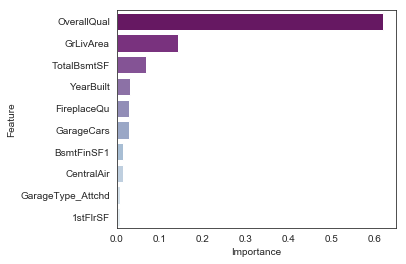

In [83]:
# visualize feature importance
# new dataframe to plot
dtree_feats = pd.Series(index = X_train.columns, data = dtree.feature_importances_).sort_values().nlargest(10).to_frame().reset_index()
dtree_feats.columns = ['Feature', 'Importance']

sns.barplot(x = 'Importance', y = 'Feature', data = dtree_feats, palette='BuPu_r')
#plt.savefig('decisiontree.png')

Make simple tree for presentation

In [84]:
%%capture
# make simple tree for presentation
dtree_simple = DecisionTreeRegressor(min_samples_leaf = 15, min_samples_split = 10, random_state = 1, max_depth = 3)

k5_cv(nt_X_train, nt_y_train, dtree_simple)

In [85]:
# import libraries to visualize tree
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [86]:
# visualize with graphviz

export_graphviz(dtree_simple, out_file = 'tree1.dot', feature_names = X_train.columns, filled = True, rounded = True, rotate = True, precision = 0, impurity = False)

### Random Forest

In [87]:
# let's look at random forest regressor, and see if we can tune it
# define the model
# initially, use max_features = sqrt(n), n_estimators = 3000, and then similar parameters as previous decision tree

rf = RandomForestRegressor(n_estimators = 3000, min_samples_leaf = 15, min_samples_split = 10, max_features = 'sqrt', random_state = 1)

# score the model 

k5_cv(X_train, y_train, rf)

Train rmse: [0.1533926020063573, 0.1484475087790906, 0.1507690963279549, 0.15119609927973338, 0.15193572086320783]

Test rmse: [0.15409088708184074, 0.1818032481921468, 0.16997661785115195, 0.16480657201083346, 0.15565499467635258]

Mean train rmse: 0.15114820545126878

Mean test rmse: 0.1652664639624651


In [88]:
rf.score(X_train, y_train)

0.8539873415037108

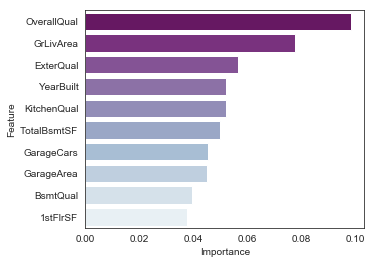

In [89]:
# visualize feature importance
# new dataframe to plot
rf_feats = pd.Series(index = X_train.columns, data = rf.feature_importances_).sort_values().nlargest(10).to_frame().reset_index()
rf_feats.columns = ['Feature', 'Importance']

sns.barplot(x = 'Importance', y = 'Feature', data = rf_feats, palette='BuPu_r')
#plt.savefig('randomforest.png')

Better than just the decision tree, not as good as lasso or elastic net. Might try to tune with grid search.

### Gradient Boosting

In [90]:
# define model

# min_samples_split = 15 --> about 1% of training set
# min_samples_leaf = 7 ---> about half of 15
# learning_Rate and n_estimators ---> more trees with lower learning rate for more robust model
# max_depth = 5 ---> based on having 180 features and 1460 observations
# max_features = 'sqrt'  ---> typical convention
# subsample = 0.8 ---> also convention
# loss = 'huber' ---> more robust to outliers than least squares ('ls')


GBoost = GradientBoostingRegressor(n_estimators = 3000, learning_rate = 0.05, max_depth = 5, max_features = 'sqrt', min_samples_leaf = 7, min_samples_split = 15, loss = 'huber', subsample = 0.8, random_state = 1)


# k5 score the model
k5_cv(X_train, y_train, GBoost) # 0.116406

Train rmse: [0.03992523850854083, 0.03437881433180581, 0.033068058925714426, 0.037560804372411875, 0.04064678947748557]

Test rmse: [0.11147627348557124, 0.1318548894169546, 0.11830461125090391, 0.11963615388892189, 0.10076009361084175]

Mean train rmse: 0.037115941123191706

Mean test rmse: 0.11640640433063867


In [91]:
# R2 score
GBoost.score(X_train, y_train)

0.9790261125970483

Text(0.5,0,'')

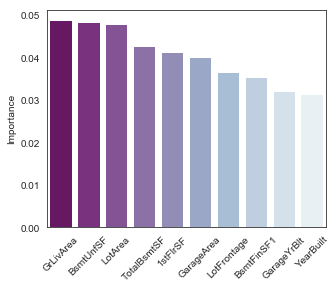

In [93]:
# visualize feature importance
# new dataframe to plot
gb_feats = pd.Series(index = X_train.columns, data = GBoost.feature_importances_).sort_values().nlargest(10).to_frame().reset_index()
gb_feats.columns = ['Feature', 'Importance']

sns.barplot(y = 'Importance', x = 'Feature', data = gb_feats, palette='BuPu_r')
plt.xticks(rotation = 45)
plt.xlabel('')
#plt.savefig('gradientboost.png')

#### Try tuning parameters

It looks like the model is slightly overfitting. Much lower training scores than test scores.

* min_samples_split (minimum number of observations which are required in a node to be considered for splitting. Too high a number could lead to under-fitting)
* max_depth (maximum depth of each tree. Too high a number could lead to over-fitting. Leads to the model learning relationsh very specific to a certain sample)
* n_estimators (the number of trees. Should be tuned for a particular learning_rate, which determines the impact of each tree on the final outcome

In [94]:
%%capture
# first model to tune
# look for good number of trees
gb_params1 = [{'n_estimators': range(500, 3500, 500)}]

GBoost1 = GradientBoostingRegressor(learning_rate = 0.05, max_depth = 5, max_features = 'sqrt', min_samples_leaf = 15, min_samples_split = 7, loss = 'huber', subsample = 0.8, random_state = 1)

gb_search1 = GridSearchCV(GBoost1, gb_params1, scoring = 'neg_mean_squared_error', cv = 5)

# grid search
gb_search1.fit(X_train, y_train)

In [95]:
print("The best number of trees for GBoost are : ", gb_search1.best_params_)

The best number of trees for GBoost are :  {'n_estimators': 500}


In [96]:
# use those parameters and see if we get a better score

gb_best1 = gb_search1.best_estimator_

# k5 cv score
k5_cv(X_train, y_train, gb_best1) # 0.11670

Train rmse: [0.07365368025782895, 0.06659791634742228, 0.06617963111912771, 0.07076325376697293, 0.07432433884258309]

Test rmse: [0.11044823176375318, 0.13043263929330767, 0.11841765352222625, 0.11963992383814764, 0.10454551822519816]

Mean train rmse: 0.07030376406678698

Mean test rmse: 0.11669679332852659


#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [97]:
%%capture
# so the best number of trees was at the low extreme of our guess
# let's tune n_estimators again and see if we can get better

gb_params2 = [{'n_estimators': range(400, 500, 10)}]

gb_search2 = GridSearchCV(GBoost1, gb_params2, scoring = 'neg_mean_squared_error', cv = 5)

# grid search
gb_search2.fit(X_train, y_train)

In [98]:
print("The best number of trees for GBoost are : ", gb_search2.best_params_)

The best number of trees for GBoost are :  {'n_estimators': 470}


In [99]:
# use those parameters and see if we get a better score

gb_best2 = gb_search2.best_estimator_

# k5 cv score
k5_cv(X_train, y_train, gb_best2) # 0.11671

# actually a worse score?

Train rmse: [0.07457064851922365, 0.06771207297257192, 0.0673833988650482, 0.07190358569337608, 0.07527481147390724]

Test rmse: [0.11053728950649318, 0.13030454224522575, 0.1185980675791096, 0.11956300371566149, 0.10456877347006573]

Mean train rmse: 0.07136890350482542

Mean test rmse: 0.11671433530331114


#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [100]:
# okay let's tune max_depth and min_samples_split

gb_params3 = [{'max_depth': range(3, 10, 2), 'min_samples_split': range(5, 21, 5)}]

GBoost3 = GradientBoostingRegressor(n_estimators = 470, learning_rate = 0.05, max_features = 'sqrt', min_samples_leaf = 5, loss = 'huber', subsample = 0.8, random_state = 1)


gb_search3 = GridSearchCV(GBoost3, gb_params3, scoring = 'neg_mean_squared_error', cv = 5)

# grid search
gb_search3.fit(X_train, y_train)

print("The best depth and min split for GBoost are : ", gb_search3.best_params_)

The best depth and min split for GBoost are :  {'max_depth': 3, 'min_samples_split': 20}


In [101]:
# use those parameters and see if we get a better score

gb_best3 = gb_search3.best_estimator_

# k5 cv score
k5_cv(X_train, y_train, gb_best3) # 0.116026

Train rmse: [0.08464955147422615, 0.07809535118708914, 0.08040129426411242, 0.08293373017623025, 0.0869144756172113]

Test rmse: [0.1107132270378497, 0.13199561293638368, 0.1177347226254971, 0.11781004730031326, 0.1018749794136744]

Mean train rmse: 0.08259888054377384

Mean test rmse: 0.11602571786274363


#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [102]:
# let's try a higher min_sample_split

gb_params4 = [{'min_samples_split': range(20, 50, 5)}]

GBoost4 = GradientBoostingRegressor(n_estimators = 470, max_depth = 3, learning_rate = 0.05, max_features = 'sqrt', min_samples_leaf = 5, loss = 'huber', subsample = 0.8, random_state = 1)


gb_search4 = GridSearchCV(GBoost4, gb_params4, scoring = 'neg_mean_squared_error', cv = 5)

# grid search
gb_search4.fit(X_train, y_train)

print("The best min split for GBoost are : ", gb_search4.best_params_)

The best min split for GBoost are :  {'min_samples_split': 35}


In [103]:
# use those parameters and see if we get a better score

gb_best4 = gb_search4.best_estimator_

# k5 cv score
k5_cv(X_train, y_train, gb_best4) # 0.116100

Train rmse: [0.0857224139249239, 0.07965008987215585, 0.08269683888003637, 0.08473713459417816, 0.08915802680547599]

Test rmse: [0.1114554464974971, 0.13038938487505317, 0.1190226503043401, 0.11749612313180179, 0.10213860572263739]

Mean train rmse: 0.08439290081535404

Mean test rmse: 0.11610044210626591


#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [104]:
# let's try a higher min_samples_leaf
# when tried range(5, 36, 5), the best score was with 5, so try a lower number

gb_params5 = [{'min_samples_leaf': range(2, 6)}]

GBoost5 = GradientBoostingRegressor(n_estimators = 470, max_depth = 3, learning_rate = 0.05, max_features = 'sqrt', min_samples_split = 35, loss = 'huber', subsample = 0.8, random_state = 1)


gb_search5 = GridSearchCV(GBoost5, gb_params5, scoring = 'neg_mean_squared_error', cv = 5)

# grid search
gb_search5.fit(X_train, y_train)

print("The best min leaf samples for GBoost are : ", gb_search5.best_params_)

The best min leaf samples for GBoost are :  {'min_samples_leaf': 3}


In [105]:
# use those parameters and see if we get a better score

gb_best5 = gb_search5.best_estimator_

# k5 cv score
k5_cv(X_train, y_train, gb_best5) # 0.11475....nice

Train rmse: [0.08395888052658969, 0.07860029076133333, 0.08211770582219781, 0.08372683048656633, 0.0876044609653932]

Test rmse: [0.10966763002583693, 0.1292297875424877, 0.11880417726086333, 0.11655315165300574, 0.09950467129091223]

Mean train rmse: 0.08320163371241607

Mean test rmse: 0.11475188355462118


#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [106]:
# okay, let's tune max_features
# sqrt of features is ~ 13.5
# let's check for lower and higher

gb_params6 = [{'max_features': range(5, 22, 2)}]

GBoost6 = GradientBoostingRegressor(n_estimators = 470, max_depth = 3, learning_rate = 0.05, min_samples_split = 35, min_samples_leaf = 3, loss = 'huber', subsample = 0.8, random_state = 1)


gb_search6 = GridSearchCV(GBoost6, gb_params6, scoring = 'neg_mean_squared_error', cv = 5)

# grid search
gb_search6.fit(X_train, y_train)

print("The best max features for GBoost are : ", gb_search6.best_params_)

The best max features for GBoost are :  {'max_features': 13}


In [107]:
# use those parameters and see if we get a better score
# 13 makes sense...that's what we had before with sqrt
gb_best6 = gb_search6.best_estimator_

# k5 cv score
k5_cv(X_train, y_train, gb_best6) # 0.11475....same

Train rmse: [0.08395888052658969, 0.07860029076133333, 0.08211770582219781, 0.08372683048656633, 0.0876044609653932]

Test rmse: [0.10966763002583693, 0.1292297875424877, 0.11880417726086333, 0.11655315165300574, 0.09950467129091223]

Mean train rmse: 0.08320163371241607

Mean test rmse: 0.11475188355462118


#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [108]:
# now look at best subsample

gb_params7 = [{'subsample': [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]}]

GBoost7 = GradientBoostingRegressor(n_estimators = 470, max_depth = 3, learning_rate = 0.05, min_samples_split = 35, min_samples_leaf = 3, max_features = 13, loss = 'huber', random_state = 1)


gb_search7 = GridSearchCV(GBoost7, gb_params7, scoring = 'neg_mean_squared_error', cv = 5)

# grid search
gb_search7.fit(X_train, y_train)

print("The best subsample size for GBoost are : ", gb_search7.best_params_)

The best subsample size for GBoost are :  {'subsample': 0.8}


#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [109]:
# same subsample score as before
# let's try halving the learning rate and doubling the number of trees

GBoost9 = GradientBoostingRegressor(n_estimators = 940, learning_rate = 0.025, max_depth = 3, min_samples_split = 35, min_samples_leaf = 3, max_features = 13, subsample = 0.8, loss = 'huber', random_state = 1)


# k5 cv score
k5_cv(X_train, y_train, GBoost9) # 0.1139470

Train rmse: [0.0832338559223752, 0.07753291661009205, 0.08040943766940578, 0.08292712798789095, 0.0865071401369437]

Test rmse: [0.10736561337613039, 0.12858849727450572, 0.11736341941420309, 0.1153652390646291, 0.10105247242988237]

Mean train rmse: 0.08212209566534154

Mean test rmse: 0.11394704831187012


#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [110]:
# do the same again
# let's try 1/4 the learning rate and quadroupling the number of trees

GBoost9 = GradientBoostingRegressor(n_estimators = 3760, learning_rate = 0.00625, max_depth = 3, min_samples_split = 35, min_samples_leaf = 3, max_features = 13, subsample = 0.8, loss = 'huber', random_state = 1)


# k5 cv score
k5_cv(X_train, y_train, GBoost9) # 0.1122776....keeps going down! Submit to kaggle to see where we're at

Train rmse: [0.08316715055834506, 0.07681470369294326, 0.08039868167592246, 0.08304172895257152, 0.08589264297822463]

Test rmse: [0.10484909430494066, 0.12730768350189076, 0.11639379814147666, 0.1134551423187897, 0.09938214443467647]

Mean train rmse: 0.08186298157160138

Mean test rmse: 0.11227757254035486


In [111]:
# R2 score
GBoost9.score(X_train, y_train)

0.9506687300513494

Text(0.5,0,'')

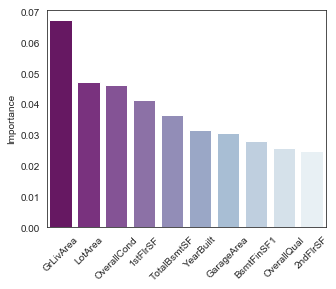

In [112]:
# visualize feature importance
plt.rcParams['figure.figsize'] = (5, 4)
# new dataframe to plot
gb9_feats = pd.Series(index = X_train.columns, data = GBoost9.feature_importances_).sort_values().nlargest(10).to_frame().reset_index()
gb9_feats.columns = ['Feature', 'Importance']

sns.barplot(y = 'Importance', x = 'Feature', data = gb9_feats, palette='BuPu_r')
plt.xticks(rotation = 45)
plt.xlabel('')
#plt.savefig('gradientboost9.png')

#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### Let's try submitting this model to Kaggle, as this is our best model yet!

In [113]:
# get predictions
# remember to take the natural exponential to convert price back to dollars

# fit model to full training set
GBoost9.fit(X_train, y_train)

# make predictions for the training set
GBoost9_train_pred = GBoost9.predict(X_train)

# make predictions for the test set to send to a csv file
GBoost9_test_pred = np.exp(GBoost9.predict(X_test))

# see what rmse is for entire training set
print("Training data rmse for tuned Gradient Boosting : ", rmsle(y_train, GBoost9_train_pred))

Training data rmse for tuned Gradient Boosting :  0.0846243461143766


In [116]:
# confirm X_test has correct observations
X_test = all_data.iloc[-1459:]


In [117]:
# send to csv
temp = pd.DataFrame()

temp['Id'] = test_Id

temp['SalePrice'] = GBoost9_test_pred

#temp.to_csv('submission1.csv', index=False)

#### 0.12179 on public leaderboard!

#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### creating graphs for presentation

In [118]:
gb_feats['Hyperparameters'] = 'Untuned'
gb9_feats['Hyperparameters'] = 'Tuned'

gb_merged = pd.concat([gb9_feats, gb_feats], axis = 0)
gb_merged = gb_merged.fillna(0).reset_index(drop=True).sort_values(by = ['Feature', 'Importance'], ascending = False)

Text(0.5,0,'')

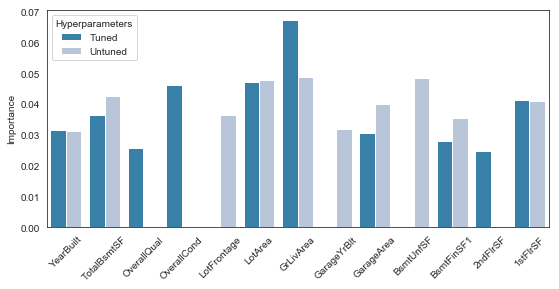

In [119]:
plt.rcParams['figure.figsize'] = (9, 4)
g = sns.barplot(x = 'Feature', y = 'Importance', hue = 'Hyperparameters', data = gb_merged, palette='PuBu_r')
plt.xticks(rotation = 45)
plt.xlabel('')

#plt.savefig('grouped.png')

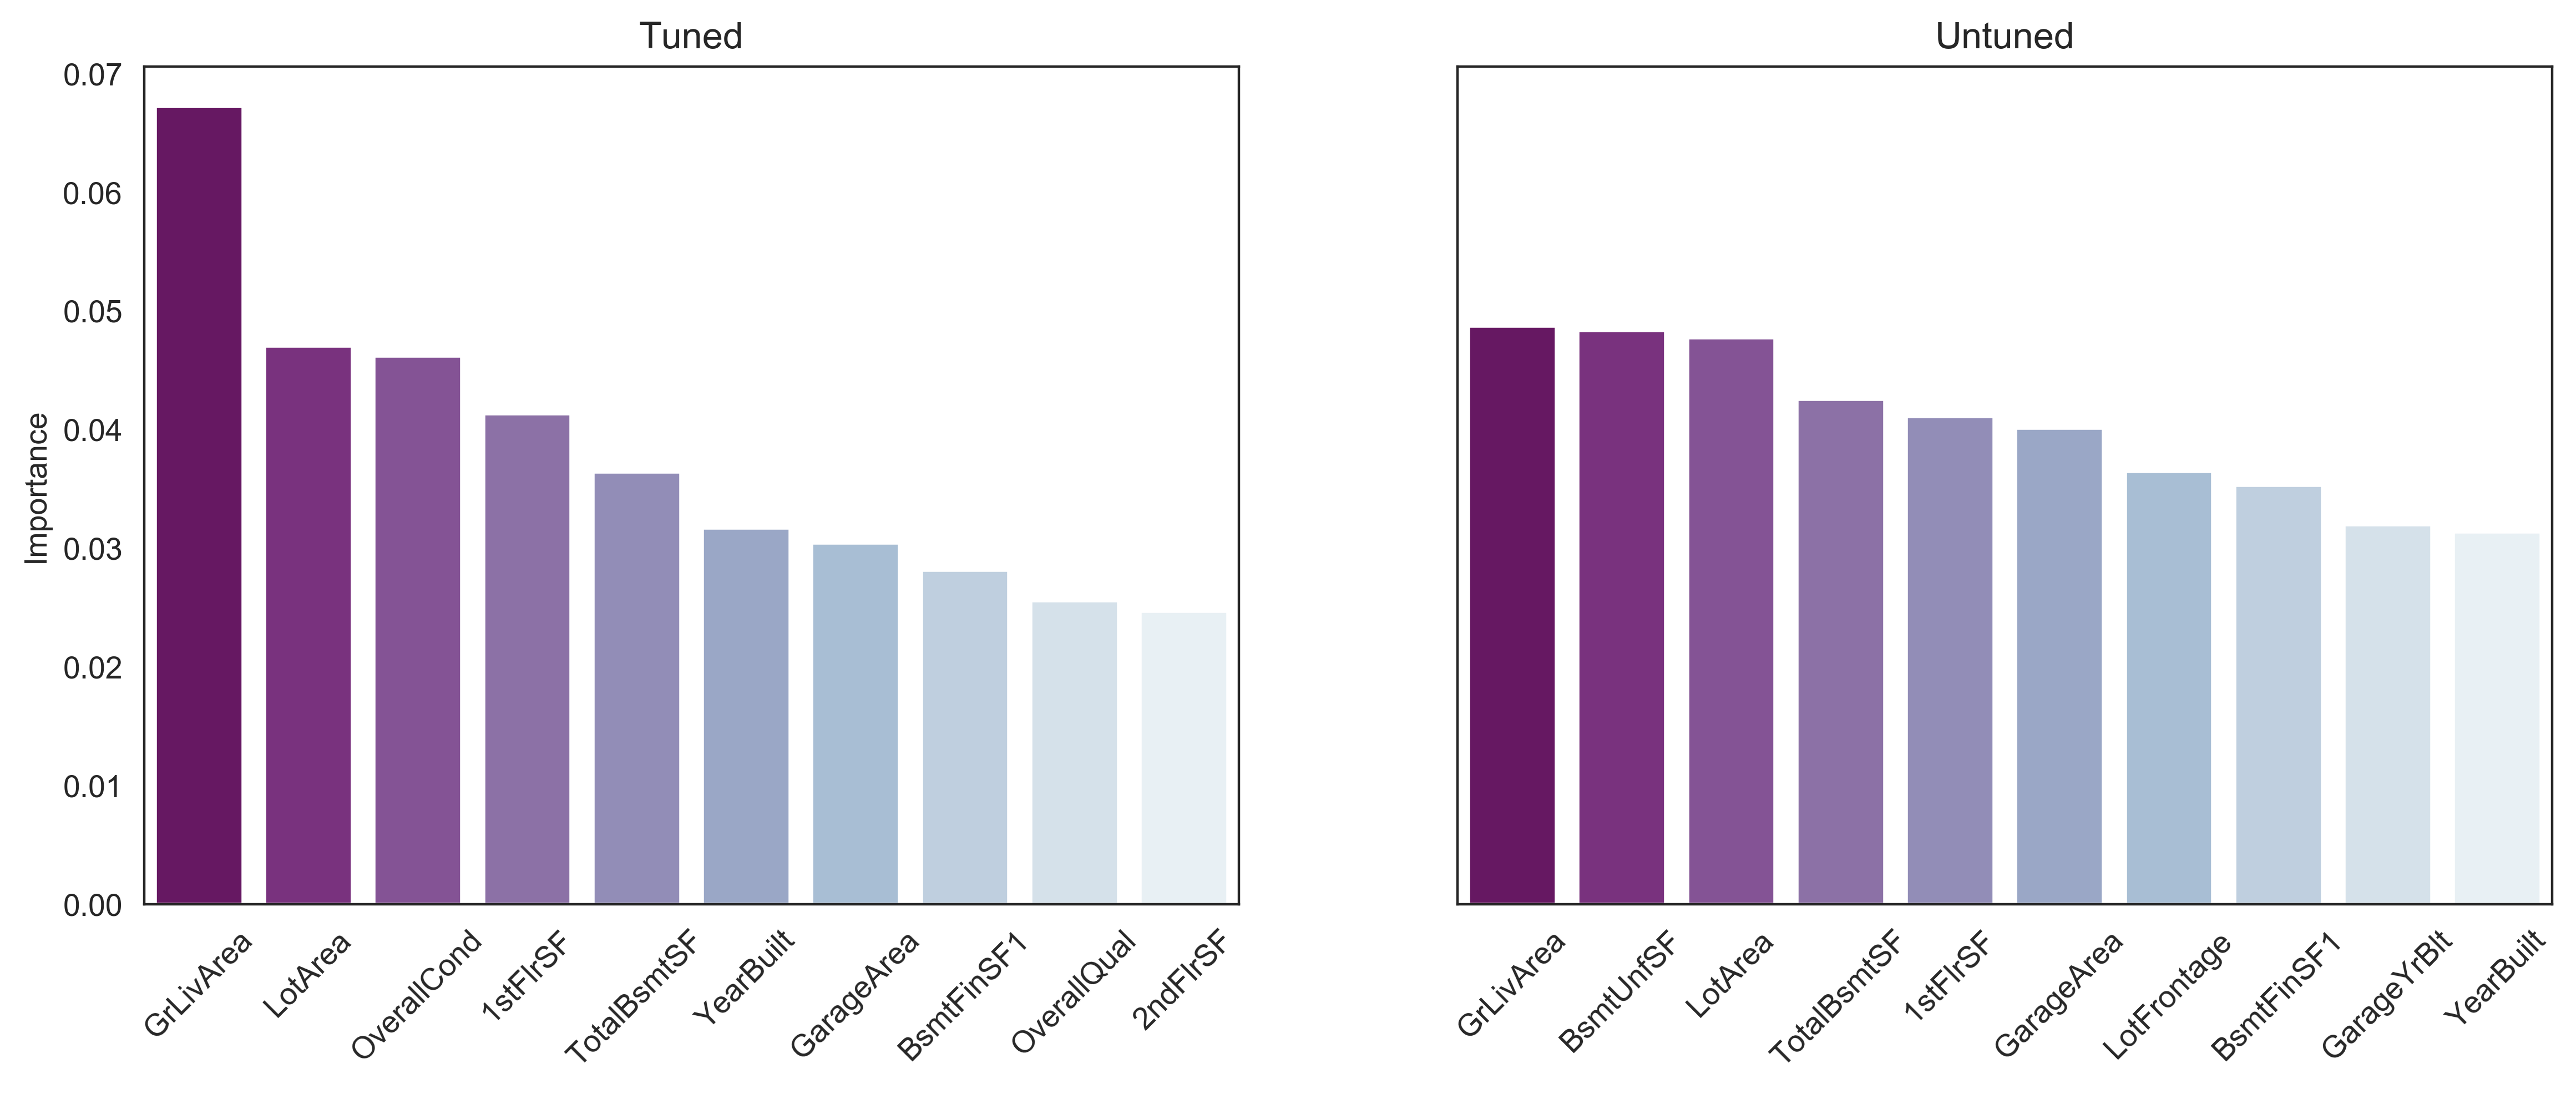

In [120]:
fig, axs = plt.subplots(ncols=2, sharey=True, figsize = (14,5), dpi=400)
#plt.xticks(rotation = 45)
sns.barplot(y = 'Importance', x = 'Feature', data = gb9_feats, palette='BuPu_r', ax=axs[0])
axs[0].set_xticklabels(gb9_feats['Feature'], rotation =45)
axs[0].set_title('Tuned')
sns.barplot(y = 'Importance', x = 'Feature', data = gb_feats, palette='BuPu_r', ax=axs[1])
axs[1].set_xticklabels(gb_feats['Feature'], rotation =45)
axs[1].set_title('Untuned')
axs[1].set(ylabel='')

for ax in axs:
    ax.set(xlabel = '')
    #ax.set_xticklabels('Feature', rotation = 45)
#plt.savefig('paired.png')

In [121]:
grouped = gb_merged.groupby(['Hyperparameters', 'Feature']).sum().groupby(level=0).apply(lambda x: x/x.sum()).sort_values(by = ['Hyperparameters', 'Importance'], ascending = False)#.reset_index()

In [122]:
grouped = grouped.unstack().fillna(0)

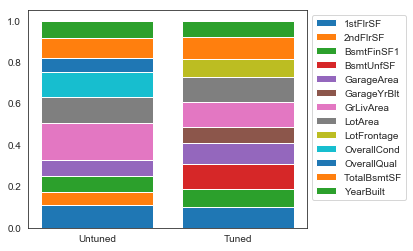

In [123]:
fig= plt.figure(figsize=(5, 4))

# position of bars on x-axis
r = [0,1]
# names of the bars and bar width
names = ['Untuned', 'Tuned']
barWidth = 0.6

# columns
cols = grouped.Importance.columns

val = 0

# create bars for each feature
for feat in cols:
    plt.bar(names, grouped.Importance[feat], bottom = val, label = feat)
    val += grouped.Importance[feat]
    
#plt.xticks(r, names)
plt.legend(bbox_to_anchor = (1, 1))


#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

## Stacked Models <a class="anchor" id="twelfth-bullet"></a>

Let's try our luck with stacking.......

We want our stacked model to do the following:
1. Split the total training set into two disjoint sets (train & holdout)
2. Train several base models on the first part (train)
3. Test base models on the second part (holdout)
4. Use the predictions from 3 (out-of-fold predictions) as the inputs, and the correct responses (target variable) as the outputs to train a higher level learner called meta-model.

The first 3 steps are done iteratively. 

For 5-fold stacking, split the data into 5 folds, train every base model on 4 folds and predict on the remaining holdout fold. Do this 5 times so that the entire dataset has been used to get out-of-fold predictions.

Then, average the predictions of all the base models on the test data and use them as meta-features on which the final prediction is done with teh meta-model.

In [124]:
# define class that does the above ^^
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone

class StackedModelsAverage(BaseEstimator, RegressorMixin, TransformerMixin):
    # BaseEstimator --> default implementation for get_params & set_params methods for estimators
    # RegressorMixin --> default implementation for score method for regression estimators
    # TransformerMixin ---> default implementation for fit_transform method for transformers
    
    # initialize the object
    def __init__(self, base_models, meta_model, n_folds = 5):
        self.base_models = base_models # will be a list of models
        self.meta_model = meta_model
        self.n_folds = n_folds
    
        
    # now fit the data on clones of the original models
    def fit(self, X, y):
        # create a new list of nested lists to store each kfold fit of the base models
        self.base_models_ = [list() for model in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        # the trailing underscores avoid naming conflicts with the __init__ method
        
        # initiate kfold (default k = 5)
        kfold = KFold(n_splits = self.n_folds, shuffle = True, random_state = 1)
        
        # train cloned base models and create out-of-fold predictions needed to train the meta model
        OOF_predictions = np.zeros((X.shape[0], len(self.base_models))) 
        # this will be filled with all the predictions from the holdout sets over the course of kfold iterations
        
        # for each model:
        for i, model in enumerate(self.base_models):
            # for each iteration of the kfold split:
            for train_index, holdout_index in kfold.split(X, y):
                # clone the model and append it to the proper position in the current base model's nested list from self.base_models_
                instance = clone(model)
                self.base_models_[i].append(instance)
                # fit the model on the in-fold observations
                instance.fit(X.iloc[train_index], y.iloc[train_index])
                # predict and append to out-of-fold predictions at proper indices
                y_pred = instance.predict(X.iloc[holdout_index])
                OOF_predictions[holdout_index, i] = y_pred
                
        # now train cloned meta-model using the out-of-fold predictions as the features input
        self.meta_model_.fit(OOF_predictions, y)
        return self
    
    
    # now do the predictions of all the base modesl on the test data and
    # use the averaged predictions as meta-features for the final prediction done by the meta-model
    def predict(self, X):
        # first make matrix with the predictions from each of the kfold iterations for each model on the test data
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis = 1) 
            for base_models in self.base_models_ ])
        
        # now predict using the meta_model that was fitted on the oof predictions
        return self.meta_model_.predict(meta_features)


### Stack with ENet, GBoost, meta = Lasso

In [125]:
# meta model
lasso_stacked = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))

# base models
ENet_stacked = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.0016, l1_ratio = 0.2, random_state = 1))

GBoost_stacked = clone(GBoost9)

Before stacking, the mean test set k5 rmse scores were:

* Lasso : 0.113
* ENet + Robust Scaler (tuned): 0.1128
* GBoost (tuned): 0.1123

In [126]:

# use Enet pipelined with the parameters from the tuned lasso, and the tuned GBoost as base models
# use untuned lasso as meta-model
stacked_models = StackedModelsAverage(base_models = (ENet_stacked, GBoost_stacked), meta_model = lasso_stacked)


In [127]:

# fit model to full training set
stacked_models.fit(X_train, y_train)

# make predictions for the training set
stacked_train_pred = stacked_models.predict(X_train)

# make predictions for the test set to send to a csv file
stacked_test_pred = np.exp(stacked_models.predict(X_test))

# see what rmse is for entire training set
print("Training data rmse for stacked models : ", rmsle(y_train, stacked_train_pred))

Training data rmse for stacked models :  0.08962851685070107


In [128]:
# sweet, let's send this to kaggle

# send to csv
temp = pd.DataFrame()

temp['Id'] = test_Id

temp['SalePrice'] = stacked_test_pred

temp.to_csv('submission4.csv', index=False)

#### BEST SCORE YET: 0.11768 on Public Leaderboard

#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### Stack with Random Forest

#### Tune Random Forest

Let's try tuning the random forest, adding it to the mix and seeing if we can get a better score.

Before, the untuned random forest test rmlse was 0.165

In [129]:
# base random forest

rf_stacked = RandomForestRegressor(n_estimators = 3000, min_samples_leaf = 7, min_samples_split = 10, max_features = 'sqrt', random_state = 1)
k5_cv(X_train, y_train, rf_stacked) # 0.15207 

Train rmse: [0.12897723078502457, 0.12450903618245585, 0.12663282437585408, 0.126825340333736, 0.12830438015359133]

Test rmse: [0.1403053095357094, 0.16880471181521406, 0.15657838943076172, 0.1518046219959233, 0.14285473482517108]

Mean train rmse: 0.12704976236613238

Mean test rmse: 0.1520695535205559


#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [130]:
# okay, let's tune n_estimators

rf_params1 = [{'n_estimators': range(2200, 2650, 50)}]

rf1 = RandomForestRegressor(min_samples_leaf = 7, min_samples_split = 10, max_features = 'sqrt', random_state = 1)


rf_search1 = GridSearchCV(rf1, rf_params1, scoring = 'neg_mean_squared_error', cv = 5)

# grid search
rf_search1.fit(X_train, y_train)

print("The best n_estimators for Random Forest are : ", rf_search1.best_params_)

The best n_estimators for Random Forest are :  {'n_estimators': 2400}


In [131]:
# use those parameters and see if we get a better score
# 13 makes sense...that's what we had before with sqrt
rf_best1 = rf_search1.best_estimator_

# k5 cv score
k5_cv(X_train, y_train, rf_best1) # 0.152094 #2400 trees

Train rmse: [0.12897918117144683, 0.12447281689894264, 0.12670429504642527, 0.12678450921619858, 0.12831961683871695]

Test rmse: [0.1403693160952056, 0.168803677051486, 0.15672274826260854, 0.15168783714839734, 0.1428880227904102]

Mean train rmse: 0.12705208383434605

Mean test rmse: 0.15209432026962155


#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [132]:
# let's try smaller n_estimators

rf_params2 = [{'n_estimators': range(509, 1010, 40)}]

rf2 = RandomForestRegressor(min_samples_split = 2, max_features = 'sqrt', random_state = 1)


rf_search2 = GridSearchCV(rf2, rf_params2, scoring = 'neg_mean_squared_error', cv = 5)

# grid search
rf_search2.fit(X_train, y_train)

print("The best n estimators for Random Forest are : ", rf_search2.best_params_)

The best n estimators for Random Forest are :  {'n_estimators': 989}


In [133]:
## use those parameters and see if we get a better score
# 13 makes sense...that's what we had before with sqrt
rf_best22 = rf_search2.best_estimator_

# k5 cv score
k5_cv(X_train, y_train, rf_best22) # 0.1382699 #509 n_estimators

Train rmse: [0.051630764308484095, 0.04912461023924155, 0.05026584194305106, 0.050706698250946, 0.052041954738157085]

Test rmse: [0.12498303647794852, 0.1553636036451239, 0.14314224538406795, 0.13876502041208694, 0.12739151899760812]

Mean train rmse: 0.050753973895975954

Mean test rmse: 0.1379290849833671


#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [134]:
rf_params3 = [{'n_estimators': [989, 1089, 1189]}]

rf3 = RandomForestRegressor(min_samples_split = 2, max_features = 'sqrt', random_state = 1)


rf_search3 = GridSearchCV(rf3, rf_params3, scoring = 'neg_mean_squared_error', cv = 5)

# grid search
rf_search3.fit(X_train, y_train)

print("The best number of estimators for Random Forest are : ", rf_search3.best_params_)

The best number of estimators for Random Forest are :  {'n_estimators': 1189}


In [135]:
## use those parameters and see if we get a better score
# 13 makes sense...that's what we had before with sqrt
rf_best3 = rf_search3.best_estimator_

# k5 cv score
k5_cv(X_train, y_train, rf_best3) # 0.137929 #989 n_estimators

Train rmse: [0.051605978690648376, 0.049073150175184224, 0.05029481006694279, 0.05067258250245472, 0.052039346086166026]

Test rmse: [0.12464440776220624, 0.15539351024029083, 0.14309632831356753, 0.13846693630740295, 0.12717337743638177]

Mean train rmse: 0.05073717350427922

Mean test rmse: 0.13775491201196985


In [136]:
# try with 2500 trees
k5_cv(X_train, y_train, RandomForestRegressor(n_estimators = 2500, min_samples_split = 2, max_features = 'sqrt', random_state = 1))

Train rmse: [0.05129269352735343, 0.04914821481321906, 0.05020673356954176, 0.050812986971702855, 0.05179048092820812]

Test rmse: [0.12457124327357036, 0.15546939967945778, 0.14274999326991952, 0.13847308686611787, 0.1269456299151508]

Mean train rmse: 0.05065022196200504

Mean test rmse: 0.13764187060084326


#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### Now Stack with RF

In [137]:
# define random forest from tuned hyperparams
rf_stacked = RandomForestRegressor(n_estimators = 2500, min_samples_split = 2, max_features = 'sqrt', random_state = 1)


stacked_models2 = StackedModelsAverage(base_models = (ENet_stacked, GBoost_stacked, lasso_stacked), meta_model = rf_stacked)

In [138]:

# fit model to full training set
stacked_models2.fit(X_train, y_train)

# make predictions for the training set
stacked2_train_pred = stacked_models2.predict(X_train)

# make predictions for the test set to send to a csv file
stacked2_test_pred = np.exp(stacked_models2.predict(X_test))

# see what rmse is for entire training set
print("Training data rmse for stacked models : ", rmsle(y_train, stacked2_train_pred))

Training data rmse for stacked models :  0.09544645259382645


In [139]:
#0.0954465
# sweet, let's send this to kaggle

# send to csv
temp = pd.DataFrame()

temp['Id'] = test_Id

temp['SalePrice'] = stacked2_test_pred

temp.to_csv('submission5.csv', index=False)

#### 0.12409 ---> let's just try with adding lasso to base models

In [140]:
# define random forest from tuned hyperparams

stacked_models3 = StackedModelsAverage(base_models = (ENet_stacked, GBoost_stacked, lasso_stacked), meta_model = lasso_stacked)

In [141]:

# fit model to full training set
stacked_models3.fit(X_train, y_train)

# make predictions for the training set
stacked3_train_pred = stacked_models3.predict(X_train)

# make predictions for the test set to send to a csv file
stacked3_test_pred = np.exp(stacked_models3.predict(X_test))

# see what rmse is for entire training set
print("Training data rmse for stacked models : ", rmsle(y_train, stacked3_train_pred))

Training data rmse for stacked models :  0.08973448693698502


In [142]:
# 0.0897
# sweet, let's send this to kaggle

# send to csv
temp = pd.DataFrame()

temp['Id'] = test_Id

temp['SalePrice'] = stacked3_test_pred

temp.to_csv('submission6.csv', index=False)